In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray 

In [3]:
plt.rcParams['font.size'] = '6'

In [4]:
def plot_ds12_diff(ds_list,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'GM: {global_mean_xarray(da).values:4.2f}') 
    ax=axs[2]
    da = ds_list[1]-ds_list[0]
    da.plot(ax=ax, levels=dlevel, extend='both') 
    # ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
    fig.tight_layout()  
def plot_zonal_ta_diff(ds_list,level = np.arange(200,330,10), dlevel = np.arange(-3,3.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'mean: {(da.mean()).values:4.2f}')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    # ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

def plot_zonal_tdt_diff(ds_list,level = np.arange(-2,2,0.1), dlevel = np.arange(-0.5,0.51,0.05)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'mean: {(da.mean()).values:4.2f} [K/day]')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f} [K/day]')   
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

#  import data

In [5]:
year_list = np.arange(1996,2005)

In [6]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_nn= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_ba= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

# plot results

## temp sturcture

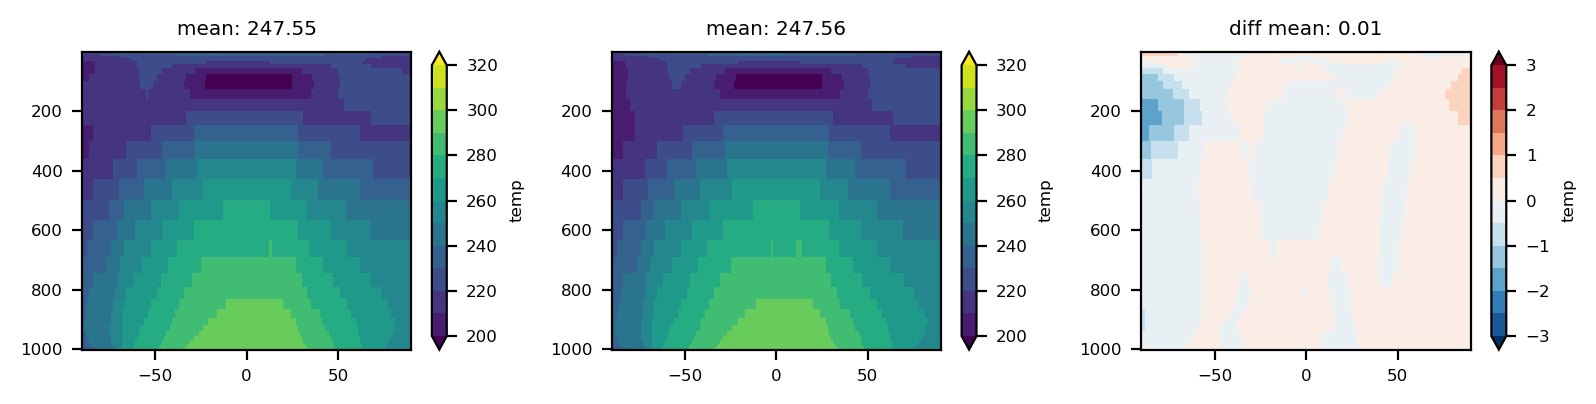

In [7]:
var = 'temp'
ds_list = [ds_ba[var].mean(['time','lon']).load(),
           ds_nn[var].mean(['time','lon']).load()]
plot_zonal_ta_diff(ds_list)

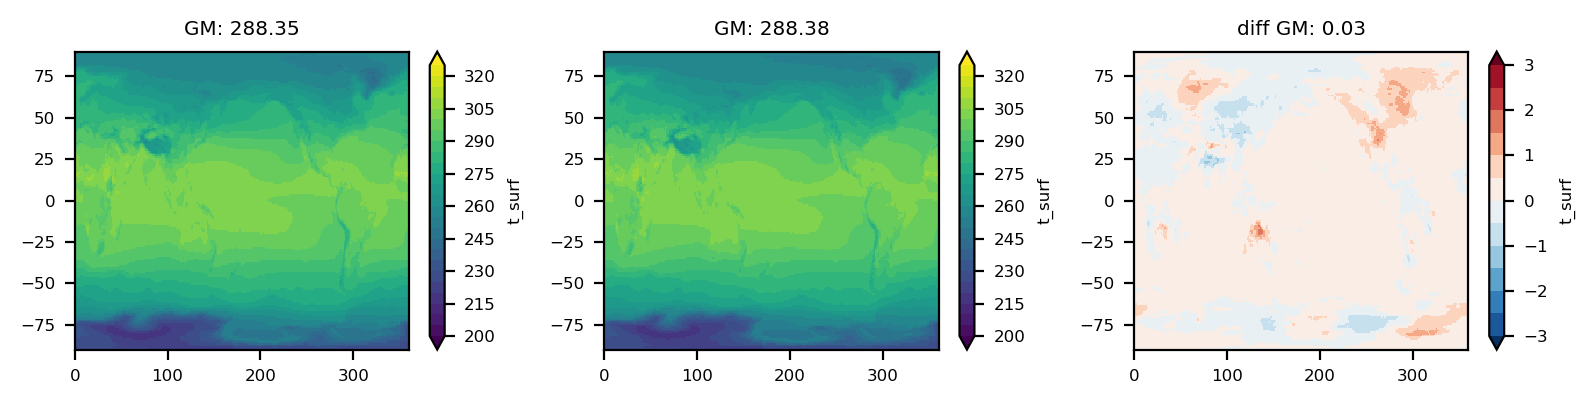

In [8]:
var = 't_surf'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(200,330,5), dlevel = np.arange(-3,3.1,0.5)) 

## lw

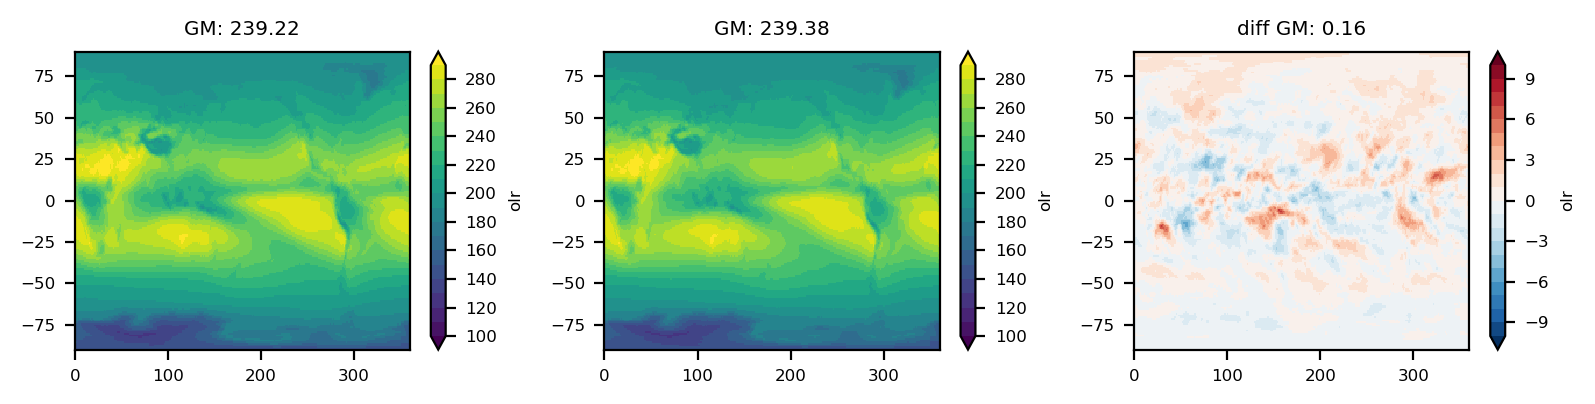

In [9]:
var = 'olr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

# swup

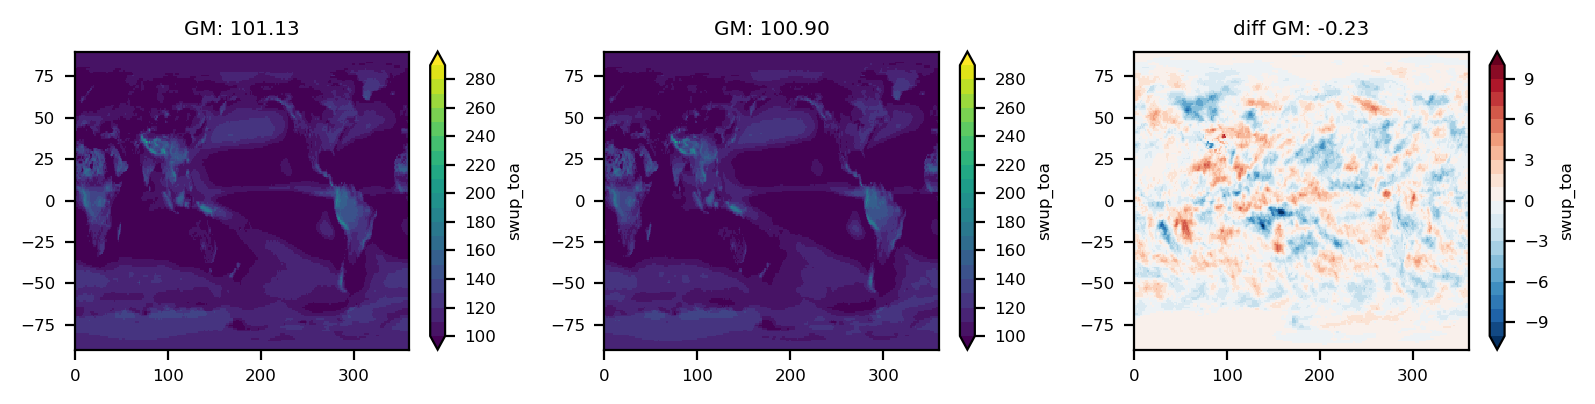

In [10]:
var = 'swup_toa'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

# 3 hourly

In [11]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/' 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_8xdaily.nc' for year in year_list],
                      chunks={"pfull": 3, "time": 240}, parallel=True)  
ds_nn= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_8xdaily.nc' for year in year_list],
                      chunks={"pfull": 3, "time": 240}, parallel=True)  
ds_ba= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

In [12]:
day_sel=[15,18,21,24,27] 
day_sel=[1,7] 
time_sel = ds_nn.time.dt.day.isin(day_sel)

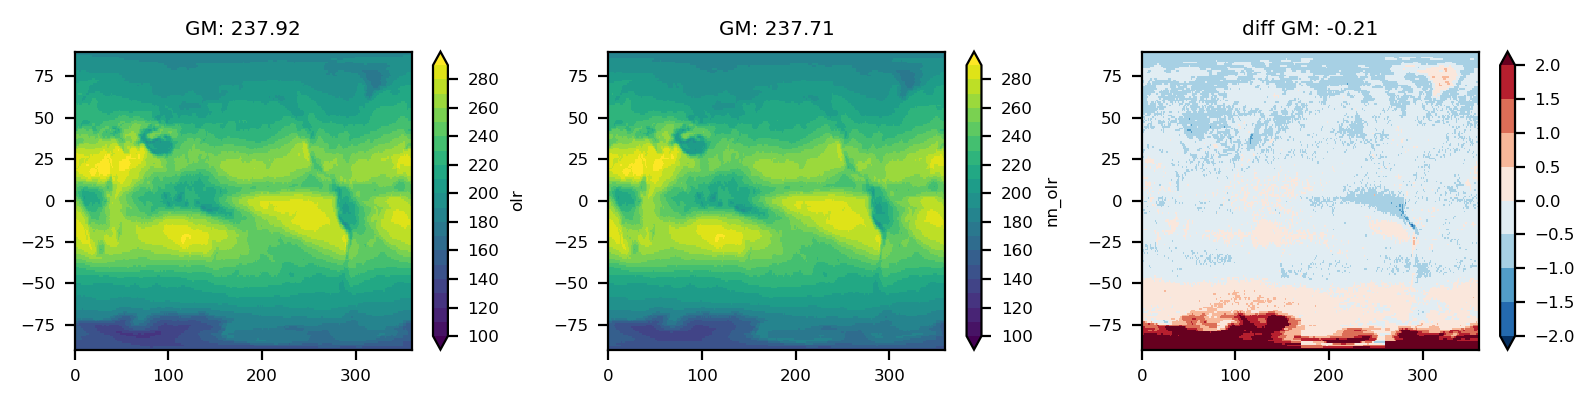

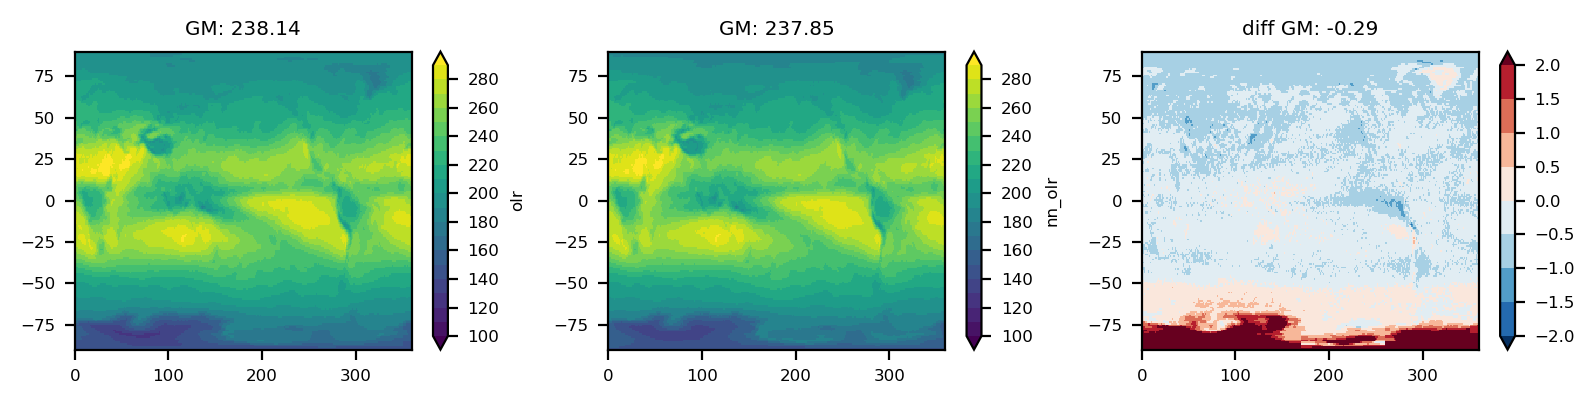

In [13]:
ds_list = [ds_ba['olr'].isel(time=time_sel).mean('time').load(),
           ds_ba['nn_olr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn['olr'].isel(time=time_sel).mean('time').load(),
           ds_nn['nn_olr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

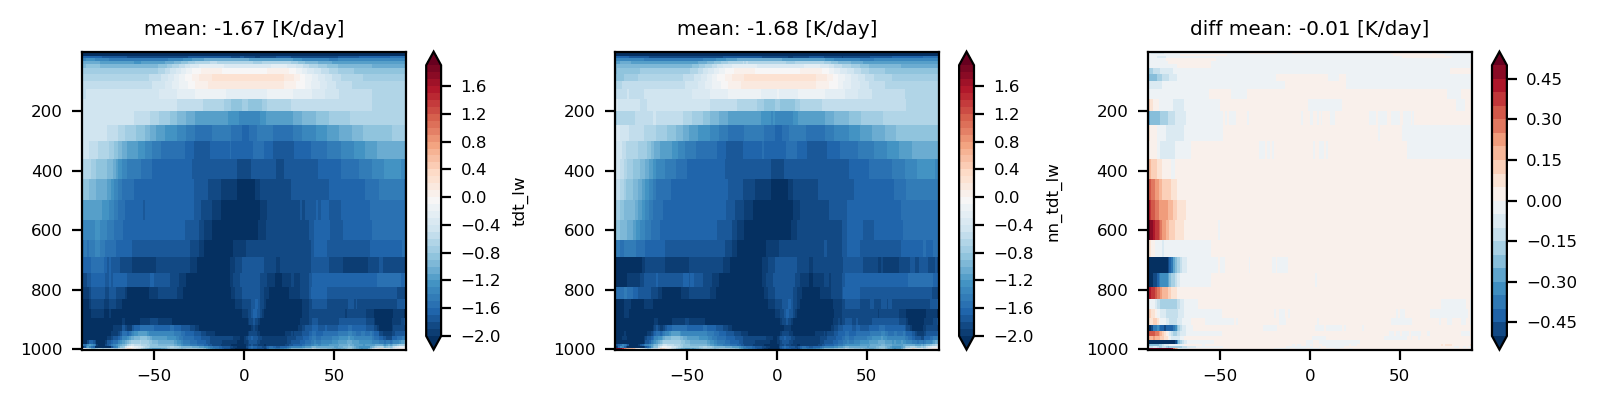

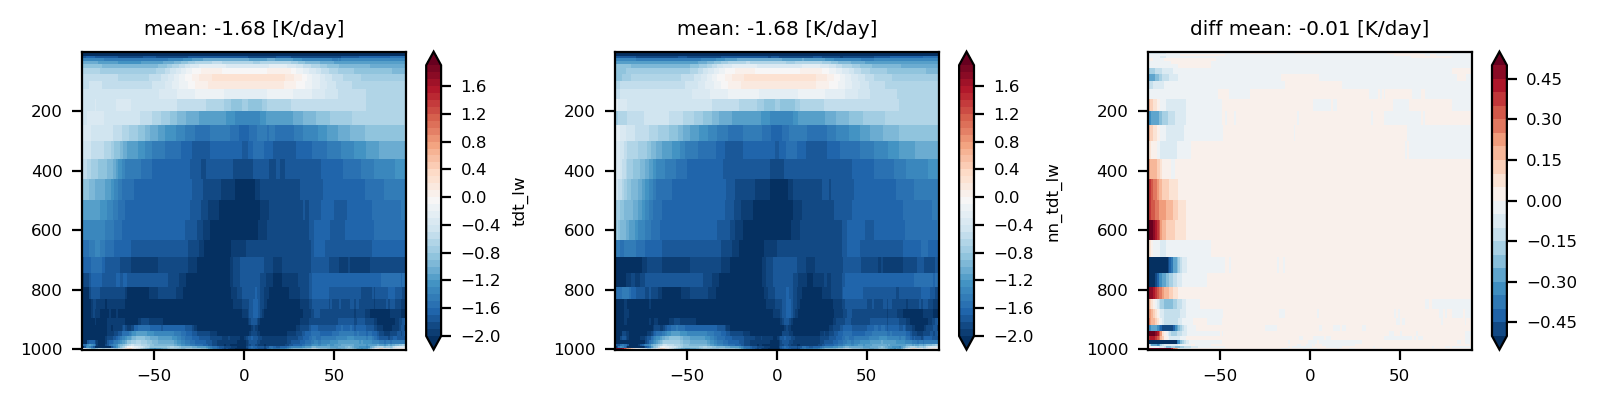

In [14]:
ds_list = [ds_ba['tdt_lw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_ba['nn_tdt_lw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 
ds_list = [ds_nn['tdt_lw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_nn['nn_tdt_lw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 

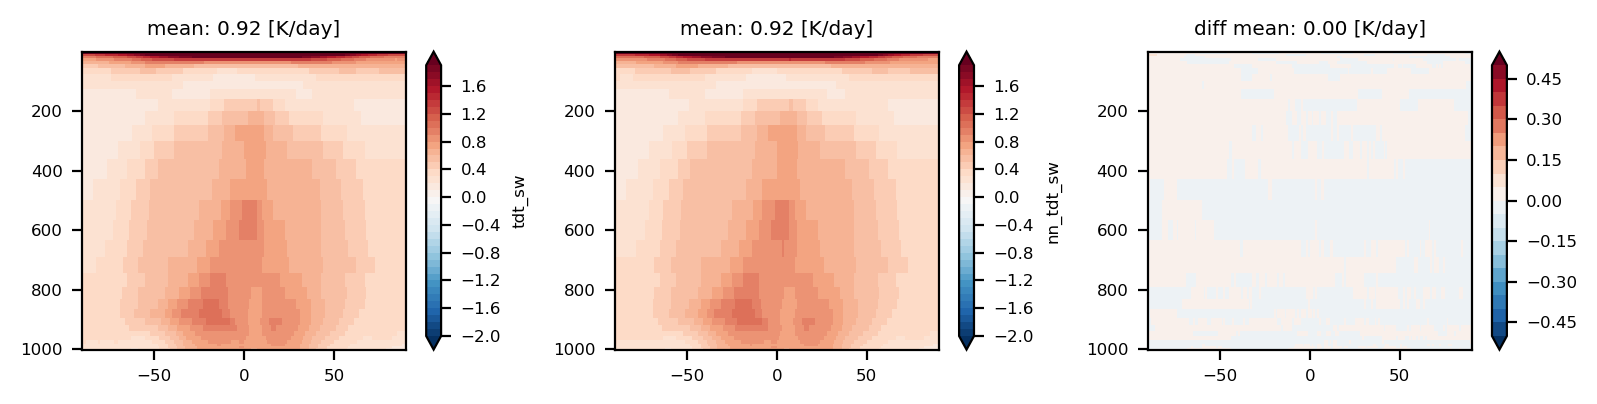

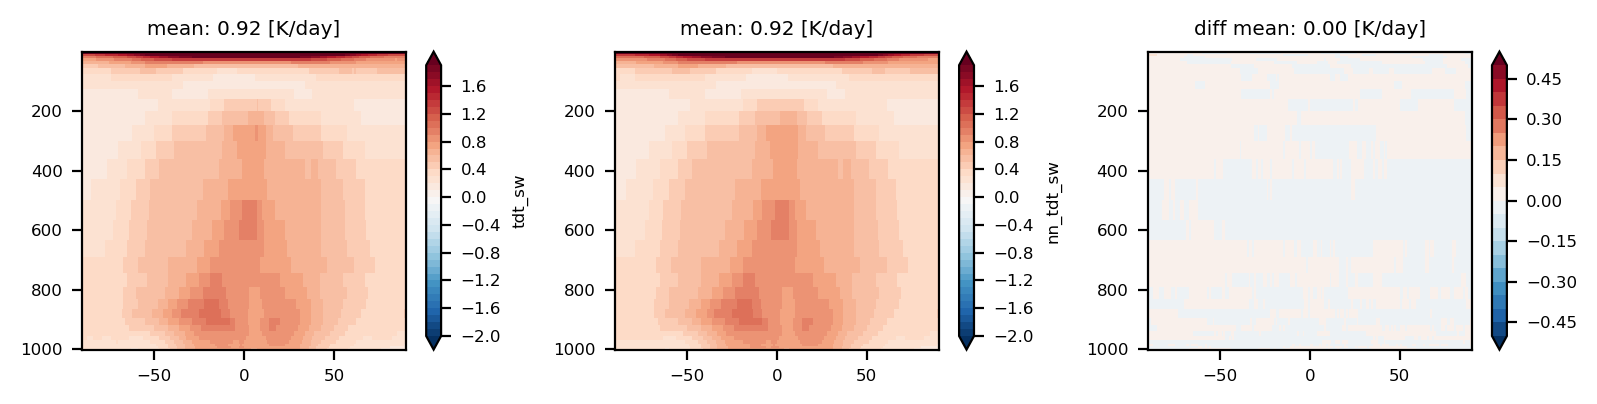

In [15]:
ds_list = [ds_ba['tdt_sw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_ba['nn_tdt_sw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 
ds_list = [ds_nn['tdt_sw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_nn['nn_tdt_sw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 

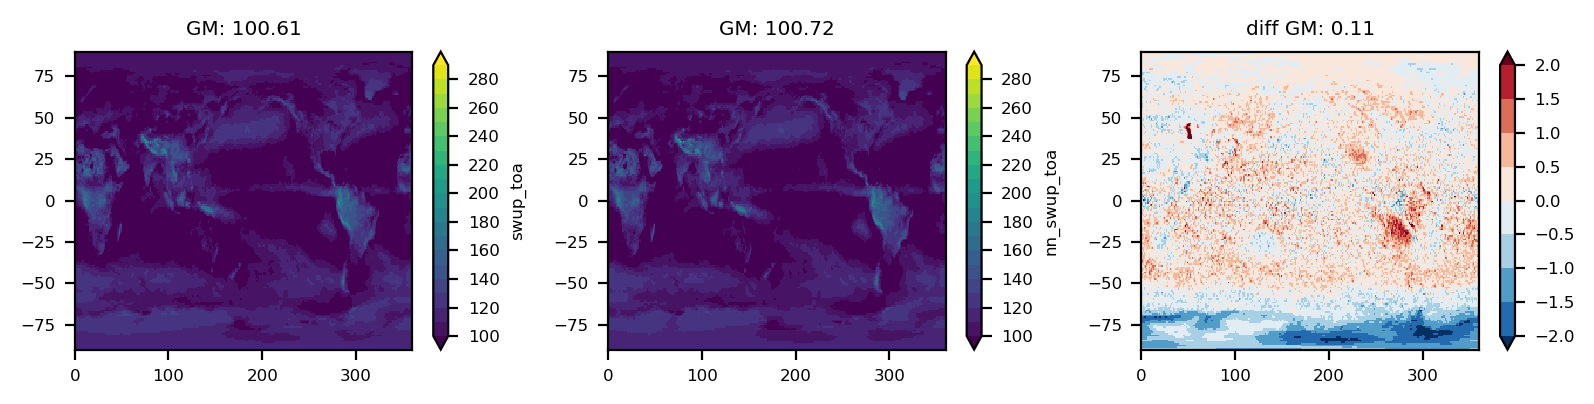

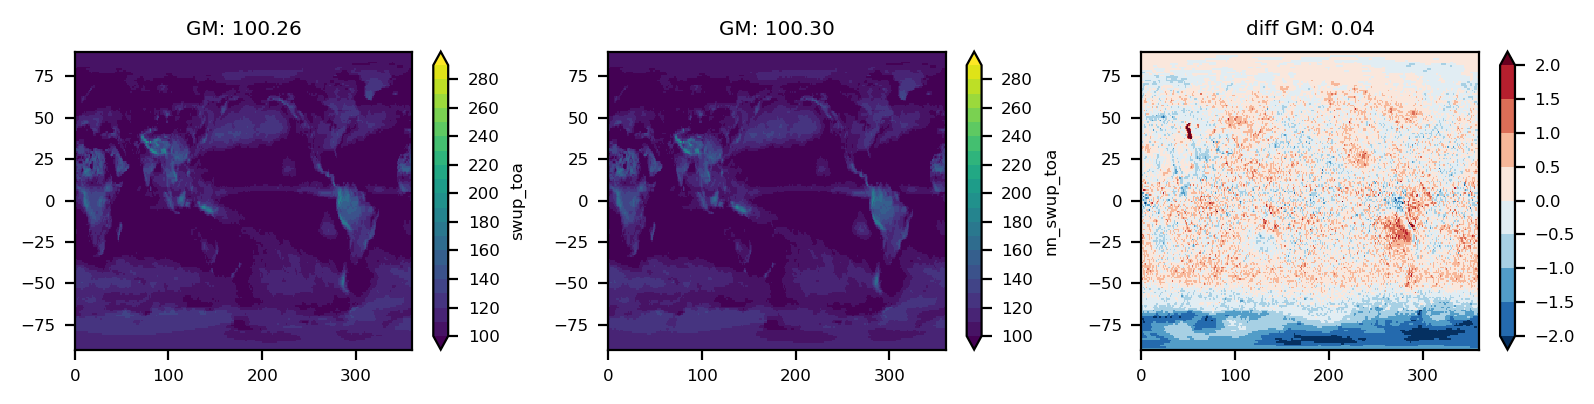

In [16]:
ds_list = [ds_ba['swup_toa'].isel(time=time_sel).mean('time').load(),
           ds_ba['nn_swup_toa'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn['swup_toa'].isel(time=time_sel).mean('time').load(),
           ds_nn['nn_swup_toa'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

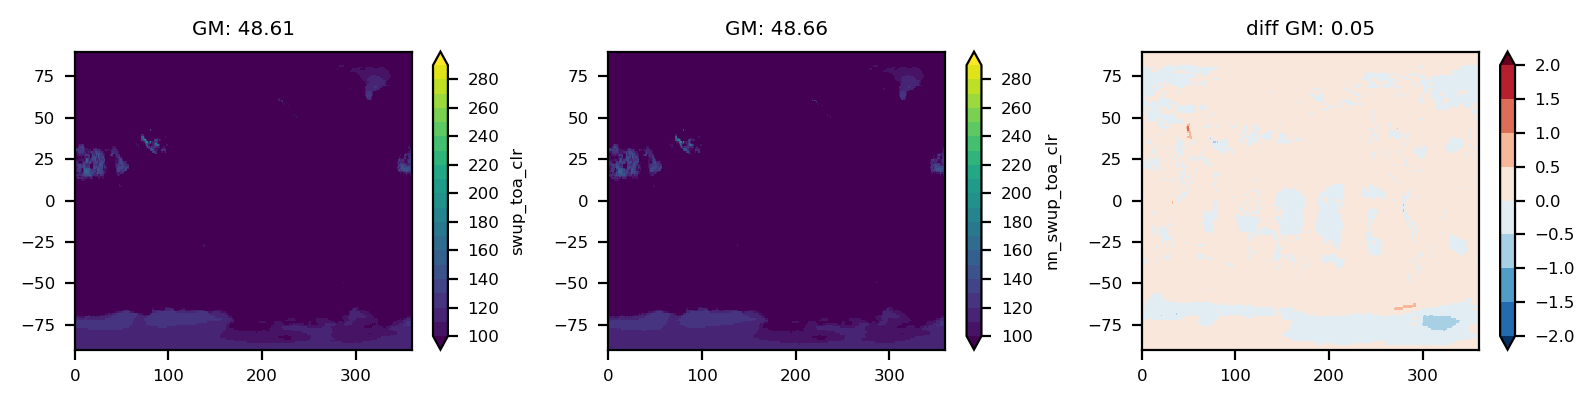

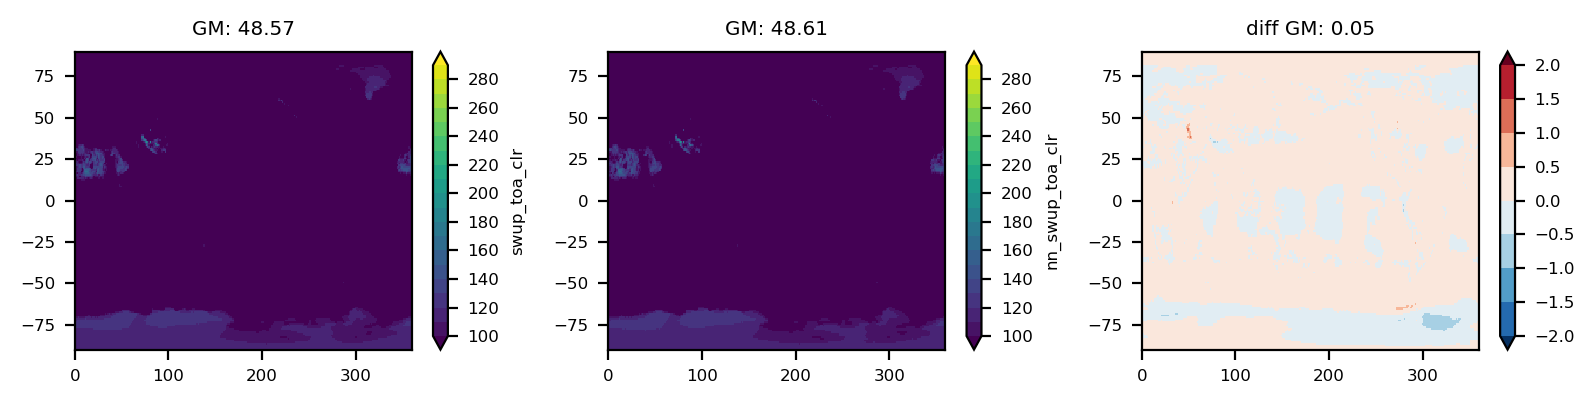

In [17]:
time_sel = ds_nn.time.dt.day.isin(day_sel) 
ds_list = [ds_ba['swup_toa_clr'].isel(time=time_sel).mean('time').load(),
           ds_ba['nn_swup_toa_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn['swup_toa_clr'].isel(time=time_sel).mean('time').load(),
           ds_nn['nn_swup_toa_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

# nn ratio

In [18]:
import pickle
# Import date class from datetime module
from datetime import datetime
import matplotlib.ticker as mtick

In [19]:
year_list, nn_ratio = pickle.load(open("nn_ratio.train_good_init.2305241552.p","rb"))

## ts_gm & ENSO

In [20]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
dssst = xr.open_dataset(file_path+'/INPUT/hadisst_sst.data.nc').sst.sel(lat=slice(-60,60))  
dssst_clm = xr.open_dataset('./hadisst_sst_ctl.data.nc').sst.sel(lat=slice(-60,60))   
gm1 = global_mean_xarray(dssst.groupby('time.year').mean('time'))
gm2 = global_mean_xarray(dssst_clm.mean('time'))
ts_anom = dssst.groupby('time.month') - dssst_clm.groupby('time.month').mean('time')
gmst_anom = global_mean_xarray(ts_anom).sel(time=slice(str(year_list[0]),str(year_list[-1])))

In [21]:
nino34 = ts_anom.sel(time=slice(str(year_list[0]),str(year_list[-1])))\
.sel(lon = slice(190,240)).sel(lat = slice(-5,5)).mean(['lat','lon']).rolling(time=12,center=True).mean() 

In [22]:
gmst_anom_y = gmst_anom.groupby('time.year').mean()
ytime = gmst_anom.time[::12] 
mtime = gmst_anom.time

In [23]:

# file_path1 = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
# file_path2 = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
# year_list = np.arange(1996,2002)

# nn_ratio = np.zeros((2,7,len(year_list)*12))

# for yi, year in enumerate(year_list):
#     for fi, fp in enumerate([file_path1, file_path2]):
#         print(year)
#         for ti in range(1,7):
#             now = datetime.now()
#             print("now =", now)
#             ds = xr.open_dataset(fp+f'/HISTORY/{year}0101.atmos_8xdaily.tile{ti}.nc')    
#             data = ds['nn_lwup_sfc'].load()
#             for mi in range(12):
#                 time_sel = data.time.dt.month.isin([mi+1])
#                 tmp = data.isel(time=time_sel).values
#                 tmp = np.where(tmp<0, 1, 0 )
#                 tmp_count = np.sum(tmp)
#                 # print(tmp, data.size, f'{tmp/data.size*100:5.2f}%')
#                 nn_ratio[fi,ti-1,yi*12+mi] = tmp_count/tmp.size*100
#         ds = xr.open_dataset(fp+f'/POSTP/{year}0101.atmos_8xdaily.nc')  
#         data = ds['nn_lwup_sfc'].load()
#         for mi in range(12):
#             time_sel = data.time.dt.month.isin([mi+1])
#             tmp = data.isel(time=time_sel).values
#             tmp = np.where(tmp<0, 1, 0 )
#             tmp_count = np.sum(tmp)
#             # print(tmp, data.size, f'{tmp/data.size*100:5.2f}%')
#             nn_ratio[fi,6,yi*12+mi] = tmp_count/tmp.size*100 
        

In [24]:
tile_name = ['Atlantic', 'Indian','Arctic', 'Pacific', 'America', 'Antarctic']
# mtime = np.arange(nn_ratio.shape[2])
# ytime = np.arange(nn_ratio.shape[2]/12)

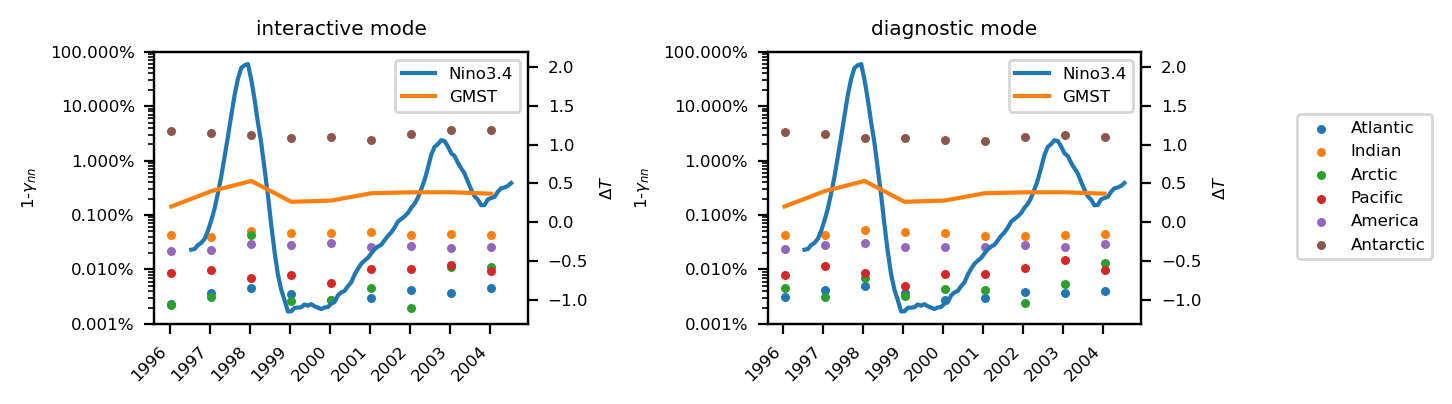

In [25]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(8,2),dpi=200)
for ti in range(6): 
    axs[0].scatter(ytime,nn_ratio[0,ti,:].reshape(-1,12).mean(axis=1),label=tile_name[ti],s=5)
    axs[1].scatter(ytime,nn_ratio[1,ti,:].reshape(-1,12).mean(axis=1),label=tile_name[ti],s=5)

for ax in axs:
    ax2 = ax.twinx()
    ax2.plot(mtime,nino34, label = 'Nino3.4') 
    ax2.plot(ytime,gmst_anom_y, label = 'GMST')  
    ax2.legend() 
    ax2.set_ylabel('$\Delta T$')
    ax.set_ylabel('1-$\gamma_{nn}$')
    ax.set_yscale('log') 
    ax.set_ylim([0.001,100])  
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=3))
ax.legend(bbox_to_anchor=(1.8, 0.8)) 
axs[0].set_title('interactive mode')
axs[1].set_title('diagnostic mode')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()  

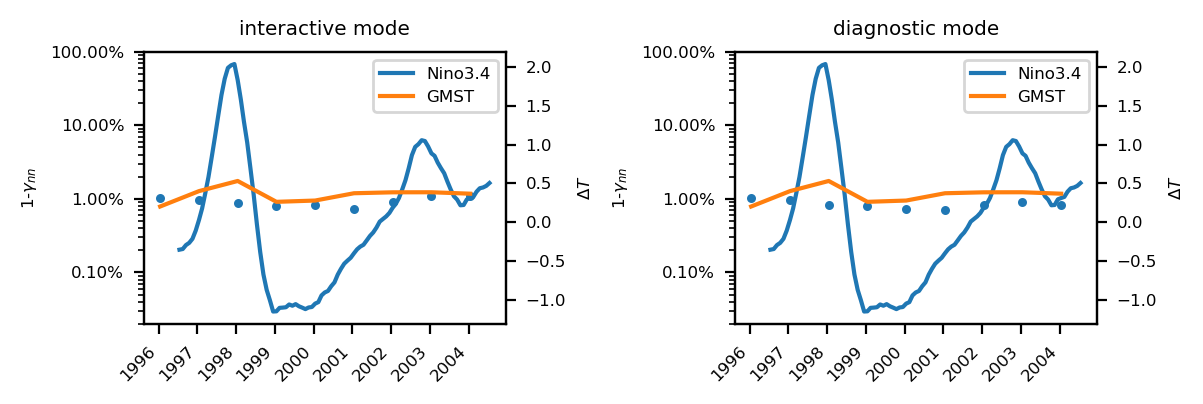

In [26]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(6,2),dpi=200) 
axs[0].scatter(ytime,nn_ratio[0,:,:].mean(axis=0).reshape(-1,12).mean(axis=1),s=5)
axs[1].scatter(ytime,nn_ratio[1,:,:].mean(axis=0).reshape(-1,12).mean(axis=1),s=5)

for ax in axs:
    ax2 = ax.twinx()
    ax2.plot(mtime,nino34, label = 'Nino3.4') 
    ax2.plot(ytime,gmst_anom_y, label = 'GMST')  
    ax2.legend()
    ax2.set_ylabel('$\Delta T$')
    ax.set_yscale('log') 
    ax.set_ylabel('1-$\gamma_{nn}$')
    ax.set_ylim([0.02,100])  
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
# ax.legend(bbox_to_anchor=(1.2, 0.8)) 
axs[0].set_title('interactive mode')
axs[1].set_title('diagnostic mode')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()  